# M7L2 - Graphs & NetworkX

## Graph Terminology 

* **Node**: A single entity in a graph.  Nodes may have arbitrary attributes such as name, color, size, etc. Nodes are typically represented as circles when drawing a graph.
* **Edge**: A connection between two nodes.  Edges may have weight, direction, or other attributes.  Edges are typically represented as lines when drawing a graph, and arrows for a directed graph.
* **Directed Graph** or **Digraph**: A graph where edges have a direction.  For example, a graph of social media users where each edge represents a follow relationship would be a directed graph.  The direction of the edge would be from the user who is following to the user who is being followed.

* **Path**: A sequence of nodes and edges connecting two nodes.
* **Cycle**: A path where the first and last nodes are the same.

* **Connected**: A graph is connected if there is a path between every pair of nodes.
* **Disconnected**: A graph is disconnected if there is no path between some pair of nodes.
* **Complete**: A graph is complete if there is an edge between every pair of nodes.

* **Acyclic**: A graph is acyclic if it has no cycles.  This means it is a tree or a forest.
* **Tree**: A graph is a tree if it is connected and acyclic.  (This also means it will inherently have a single root node.)
* **Forest**: A graph is a forest if it is disconnected and acyclic.  (This also means it will inherently have multiple root nodes.)

## Depth First Search (DFS) vs Breadth First Search (BFS)

**Depth First Search**: A search algorithm that starts at the root node and explores as far as possible along each branch before backtracking.

Good for finding all nodes connected to a given node.

Uses a stack to keep track of the nodes to visit.  Last in, first out - we visit nodes as we see them & keep track of other nodes to visit/backtrack to later.

**Breadth First Search**: A search algorithm that starts at the root node and explores the neighbor nodes first, before moving to the next level neighbors.

Good for finding the shortest path between two nodes.

Uses a queue to keep track of the nodes to visit.  First in, first out - we enqueue nodes as we see them & visit nodes in the order they were seen.

## Graph Representation

There are many ways to represent a graph.  The most common are and adjacency matrix and adjacency list.

Adjacency matrix: A matrix where the rows and columns represent nodes and the values represent the edges between nodes.

Adjacency list: A list where each index represents a node and the values represent the edges between nodes.

### Simple Python Graph

In [1]:
class Graph:
    def __init__(self):
        # keys are names of nodes, value are node attributes
        self.nodes = {
        }
        # keys are tuples of nodes, values are lists of adjacent nodes
        self.edges = defaultdict(dict)
        
    def add_node(self, value, **attributes):
        """
        Add a node to the graph.

        Parameters
        ----------
        value : hashable
            The value of the node to add.
        attributes: keyword arguments
            Attributes to add to the node.

        Example:
        >>> g = Graph()
        >>> g.add_node(1, color='red', city_name="Chicago")
        >>> g.nodes
        {1: {'color': 'red'}}
        """
        self.nodes[value] = attributes

    def add_edge(self, from_node, to_node):
        """
        Add an edge to the graph.

        Parameters
        ----------
        from_node : hashable
            The value of the node the edge is coming from.
        to_node : hashable
            The value of the node the edge is going to.
        """
        self.edges[from_node].append(to_node)
        self.edges[to_node].append(from_node)


## NetworkX

NetworkX is a full-featured Python library for working with graphs.  It provides a wide range of graph algorithms, drawing tools, and data structures.

Credits: Large of this section are based on the NetworkX tutorial: https://networkx.org/documentation/stable/tutorial.html

### Creating an empty graph

In [2]:
import networkx as nx

g = nx.Graph()
g

As we'll see later, there are lots of other options to get a graph with some nodes and edges already in it.

### Nodes

In NetworkX, nodes can be any [hashable](https://docs.python.org/3/glossary.html#term-hashable) object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.

In [3]:
g.add_node(1)
g.add_node("Hello")

You can add one node at a time via `add_node()` or add nodes from any [iterable](https://docs.python.org/3/glossary.html#term-iterable) container, such as a list via `add_nodes_from()`.

In [4]:
g.add_nodes_from([2, 3])

You can also add nodes along with node
attributes if your container yields 2-tuples of the form
`(node, node_attribute_dict)`:

In [5]:
g.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"})])

We can also add nodes from another graph:

In [6]:
c5 = nx.complete_graph(5)
g.add_nodes_from(c5)

Not to be confused for

In [7]:
g.add_node(c5)

This adds `c5` as a node in `g` rather than adding the nodes from `c5` to `g`.  The decision in NetworkX to allow arbitrary objects as nodes is very powerful.

You can have your nodes represent actual data structures (files, functions, database records, etc.) and use the graph structure to represent relationships between them.

You can also decide you want each node to just be a name or ID, and just use a dictionary keyed by node name to store the node attributes if you prefer.

### Adding edges

Graphs can also be grown by adding edges.  Like nodes, edges can be added one at a time, or from a container of edge-tuples.

In [8]:
g.add_edge(1, 2)
g.add_edges_from([(2, 3), (1, 3)])

Note: The `nx.Graph` class represents an undirected graph, if you want a directed graph use `nx.DiGraph`.

Edges can have attributes too.

In [6]:
# weight is a special attribute that must be numeric
g.add_edge(5, 6, weight=4.7)

# other attributes can be any Python object
g.add_edge(3, 6, annotation="this is an edge from 3 to 6", koalas=10)

### Accessing nodes and edges

You can access nodes and edges using the `nodes` and `edges` attributes.

In [9]:
list(g.nodes)

[1, 'Hello', 2, 3, 4, 5, 0, <networkx.classes.graph.Graph at 0x10480d6f0>]

In [8]:
list(g.edges)

[(1, 2), (1, 3), (2, 3), (3, 6), (5, 6)]

Some other useful methods:

In [9]:
g.number_of_nodes()

8

In [10]:
g.number_of_edges()

5

### Alternative constructors

Graph objects do not have to be built up incrementally - data specifying
graph structure can be passed directly to the constructors of the various
graph classes.

When creating a graph structure by instantiating one of the graph
classes you can specify data in several formats.

In [10]:
# create one graph from another
g.add_edge(1, 2)
dg = nx.DiGraph(g)  # create a DiGraph using the connections from G
list(dg.edges())

[(1, 2), (1, 3), (2, 1), (2, 3), (3, 2), (3, 1)]

In [11]:
# create a graph from an edge-list (nodes will be created automatically)
edgelist = [(0, 1), (1, 2), (2, 3), (72, "eighty-five")]
g = nx.Graph(edgelist)
list(g.edges())

[(0, 1), (1, 2), (2, 3), (72, 'eighty-five')]

In [12]:
# create a graph from a dictionary mapping nodes to nodes
adjacency_dict = {0: (1, "g"), 1: (0, 2), 2: (0, 1)}
h = nx.Graph(adjacency_dict)
list(h.edges())

[(0, 1), (0, 'g'), (0, 2), (1, 2)]

### Accessing edges and neighbors using subscript notation

In addition to the views `Graph.edges`, and `Graph.adj`,
access to edges and neighbors is possible using subscript notation.

In [14]:
g = nx.Graph([(1, 2, {"color": "yellow"})])
print(g[1])
print(g[1][2])
print(g.edges[1, 2])

{2: {'color': 'yellow'}}
{'color': 'yellow'}
{'color': 'yellow'}


You can get/set the attributes of an edge using subscript notation
if the edge already exists.

In [15]:
g.add_edge(1, 3)
g[1][3]["color"] = "blue"
g.edges[1, 2]["color"] = "red"
g.edges[1, 2]

g.set_edge_property(1, 2, "blue")

{'color': 'red'}

### Adding attributes to graphs, nodes, and edges

Attributes such as weights, labels, colors, or whatever Python object you like,
can be attached to graphs, nodes, or edges.

Each graph, node, and edge can hold key/value attribute pairs in an associated
attribute dictionary (the keys must be hashable).  By default these are empty,
but attributes can be added or changed using `add_edge`, `add_node` or direct
manipulation of the attribute dictionaries named `G.graph`, `G.nodes`, and
`G.edges` for a graph `G`.

### Graph generators and graph operations

In addition to constructing graphs node-by-node or edge-by-edge, they
can also be generated in a number of other ways:

https://networkx.org/documentation/stable/reference/generators.html

Has a list of functions that can be used to generate common graphs.

For example, a complete graph of 100 nodes can be created using:

In [26]:
c100 = nx.complete_graph(100)
print(nx.number_of_nodes(c100), "nodes", nx.number_of_edges(c100), "edges")

100 nodes 4950 edges


And a balanced tree can be created via 

In [14]:
tree = nx.balanced_tree(2, 5)  # binary tree (n=2), height=3
#nx.draw_shell(g, with_labels=True, font_weight="bold")

There are also many standard graph operations provided by NetworkX.

<https://networkx.org/documentation/stable/reference/algorithms/index.html>

<https://networkx.org/documentation/stable/reference/functions.html>

For example, to compute the shortest path between all nodes in a graph:

In [20]:
paths = nx.shortest_path(tree)
paths[0][4]

[0, 1, 4]

### Drawing graphs

NetworkX is not a graph drawing package, but provides helper methods to work with Graphviz and Matplotlib.

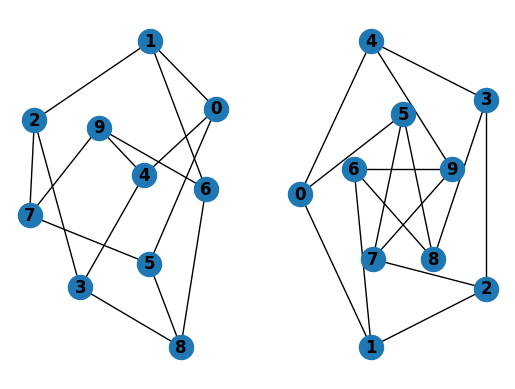

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

g = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(g, with_labels=True, font_weight="bold")
subax2 = plt.subplot(122)
nx.draw_shell(g, nlist=[range(5, 10), range(5)], with_labels=True, font_weight="bold")

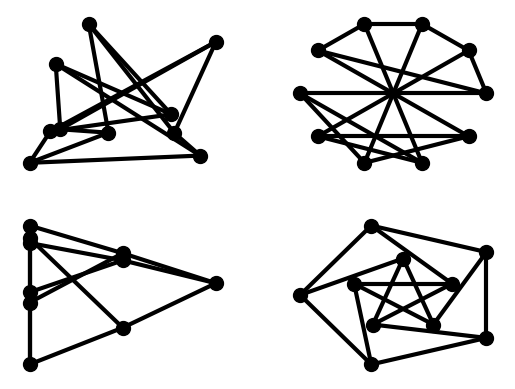

In [23]:
options = {
    "node_color": "black",
    "node_size": 100,
    "width": 3,
}
subax1 = plt.subplot(221)
nx.draw_random(g, **options)
subax2 = plt.subplot(222)
nx.draw_circular(g, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(g, **options)
subax4 = plt.subplot(224)
nx.draw_shell(g, nlist=[range(5, 10), range(5)], **options)

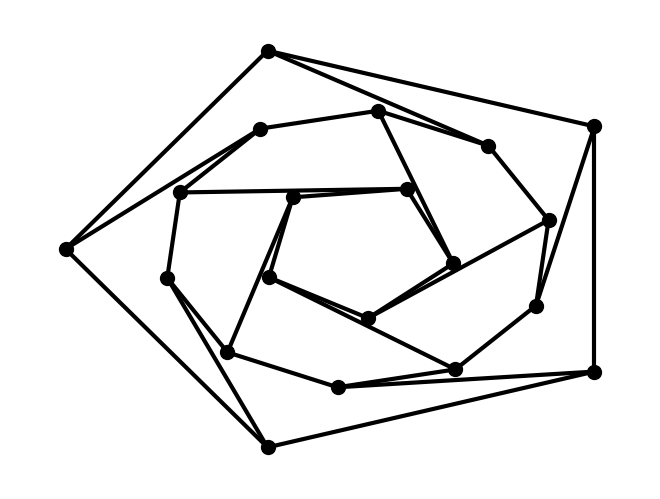

In [38]:
g = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(g, nlist=shells, **options)

<
https://networkx.org/documentation/stable/reference/drawing.html>

## Graph Algorithm: Topological Sort

Topological sort is an algorithm that is specific to Directed Acyclic Graphs.

We mentioned before that DAGs are often used for managing dependencies (e.g. this software package requires these others first) or steps in a data pipeline.

Running a topological sort on a graph gives a list of vertices in *an* acceptable order, such that each dependent node is only visited after all of its dependencies have been satisfied.  (Emphasis on *an*, many such orderings may exist.)

DFS in psuedo-code:

We need a list `TL`, and a function `visit`.  

We will also define three "colors" for our nodes.

* White: Unvisited
* Blue: Temporary Mark
* Black: Permanent Mark

```
while there are unvisited nodes:
    select a random white/unmarked node -> n
    visit(n)
    
def visit(node):
    if n is black/visited:
        return
    if n is blue/temporary:
        abort -- the graph has cycles and cannot be resolved
        
    mark n blue
    
    for each node m with an edge from n to m:
        visit(m)
    
    mark n black (removing blue mark)
    add n to head of TL
```

(this is essentially a Depth First Search with some extra work to detect cycles)

In [24]:
dg = nx.DiGraph((["scrape data A", "clean data A"],
                 ["clean data A", "merge data"],
                 ["merge data", "import to SQL"],
                 ["setup database", "import to SQL"],
                 ["import to SQL", "generate queries"],
                 ["generate queries", "data viz"],
                 ["data viz", "presentation"],
                 ["collect data B", "clean data B"],
                 ["clean data B", "merge data"],
                 ["plan data viz", "data viz"],
                ))

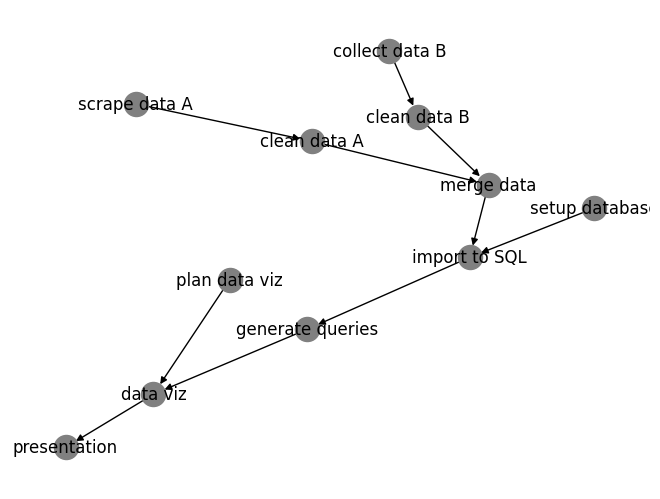

In [25]:
nx.draw_spring(dg, with_labels=True, node_color="grey")

In [149]:
import random

def visit(name, existing_path):
    data = dg.nodes(data=True)[name]
    if data["color"] == "BLACK":
        return
    elif data["color"] == "BLUE":
        raise Exception("Cycle Detected!")
    
    data["color"] = "BLUE"
    
    # DFS-like visit to all connected nodes before processing this node
    for m in dg.predecessors(name):
        visit(m, existing_path)
    
    data["color"] = "BLACK"
    # prepend to path
    existing_path.insert(0, name)
    
def topo_sort(graph):
    ordering = []
    
    # add color to each node
    for d in graph.nodes.data():
        d[1]["color"] = "WHITE"
    
    # while there are unvisited nodes
    while len(ordering) < len(graph.nodes):
        # unvisited nodes
        unvisited = [name for name, data in graph.nodes.items() if data["color"] == "WHITE"]
        visit(random.choice(unvisited), ordering)
    if cycle_detected:
        return "cycle detected"
    return ordering[::-1]

In [ ]:
for node in None:
    process_step(node)

In [150]:
topo_sort(dg)

['scrape data A',
 'clean data A',
 'collect data B',
 'clean data B',
 'merge data',
 'setup database',
 'import to SQL',
 'plan data viz',
 'generate queries',
 'data viz',
 'presentation']

## Dijkstra's algorithm 

Thi sis an algorithm to find the shortest path (accounting for edge weights).  This means it can be used for real-world routing, networks, but also for many other applications depending on what your edge weights represent. 

(e.g. if you somehow weighted a social graph with how well two people know one another, you could find your closest connection using criteria other than degrees away)

**In English**

1) Mark all nodes "unvisited" and build a set of the unvisited nodes called the unvisited set.

2) Assign to every node a "tentative distance" value, 0 for our starting node, Infinity for all others.  We will update these tentative distances with the length of the shortest path to that node *yet discovered*.

3) Set the current node to the starting node.

4) For the current node, consider all unvisited neighbors and calculate their tentative distances through the current node.  If the distance through the current node is less than the tentative distance, update the node's tentative distance.

5) When we have visited all neighbors of the current node, mark the node as visited/remove it from the unvisited set.

6) If the desination node has been marked visited, stop.  Otherwise select the unvisited node witht he smallest tentative distance and set it as the new current node.  Go back to step 3.